In [24]:
import colorsys

import matplotlib.pyplot as plt
from matplotlib import legend as mlegend
from matplotlib import ticker as mticker
import pandas as pd
import seaborn as sns
import numpy as np

import dew_gwdata as gd
import wrap_technote as tn

In [12]:
%matplotlib inline
# plt.style.use("ggplot")
plt.rcParams["figure.dpi"] = 150

In [ ]:
report = tn.

In [13]:
df = pd.read_excel(
    r"R:\DFW_CBD\Projects\Projects_Science\Water Resource Assessments\Annual\2019-20 reporting\Data\Barossa\Extraction\extraction.xlsx"
)
df["Year2"] = df.Year.str[:4].astype(int)
df["total"] = df["Upper Aquifer"] + df["Lower Aquifer"] + df["Fractured rock aquifers"]
df

,Year,Upper Aquifer,Lower Aquifer,Fractured rock aquifers,Year2,total
0,2003/04,500.000,1092.000,1831.000,2003,3423.000
1,2004/05,292.701,581.881,1176.539,2004,2051.121
2,2005/06,181.451,512.466,812.530,2005,1506.447
3,2006/07,381.514,1104.296,1842.686,2006,3328.496
4,2007/08,412.215,1199.848,1791.682,2007,3403.745
5,2008/09,350.897,1002.978,1627.278,2008,2981.153
6,2009/10,265.560,690.841,1131.512,2009,2087.913
7,2010/11,120.817,223.522,912.738,2010,1257.077
8,2011/12,216.790,490.616,1313.603,2011,2021.009
9,2012/13,468.080,943.047,1967.524,2012,3378.651


In [14]:
dfm = df.melt(
    id_vars=["Year2", "Year"],
    value_vars=["Upper Aquifer", "Lower Aquifer", "Fractured rock aquifers"],
).rename(columns={"variable": "Aquifer", "value": "Extracted in ML"})
dfm

,Year2,Year,Aquifer,Extracted in ML
0,2003,2003/04,Upper Aquifer,500.000
1,2004,2004/05,Upper Aquifer,292.701
2,2005,2005/06,Upper Aquifer,181.451
3,2006,2006/07,Upper Aquifer,381.514
4,2007,2007/08,Upper Aquifer,412.215
5,2008,2008/09,Upper Aquifer,350.897
6,2009,2009/10,Upper Aquifer,265.560
7,2010,2010/11,Upper Aquifer,120.817
8,2011,2011/12,Upper Aquifer,216.790
9,2012,2012/13,Upper Aquifer,468.080


In [15]:
rgba_to_hsva = lambda c: tuple(list(colorsys.rgb_to_hsv(c[0], c[1], c[2])) + [c[3]])


def darken(rgba, factor):
    h, s, v = colorsys.rgb_to_hsv(rgba[0], rgba[1], rgba[2])
    r, g, b = colorsys.hsv_to_rgb(h, s, v * factor)
    return (r, g, b, rgba[3])

Remove every second label from the x-axis, keeping the most recent label.

In [16]:
x = dfm["Year"].unique()
x_idx = range(len(x))
x_labels = [x[i] for i in x_idx]
for i in x_idx[::-1]:
    print((i, len(x) - i, x[i]))
    if ((len(x) - i) % 2) == 0:
        x_labels[i] = ""
print(x_labels)

(14, 1, '2017/18')
(13, 2, '2016/17')
(12, 3, '2015/16')
(11, 4, '2014/15')
(10, 5, '2013/14')
(9, 6, '2012/13')
(8, 7, '2011/12')
(7, 8, '2010/11')
(6, 9, '2009/10')
(5, 10, '2008/09')
(4, 11, '2007/08')
(3, 12, '2006/07')
(2, 13, '2005/06')
(1, 14, '2004/05')
(0, 15, '2003/04')
['2003/04', '', '2005/06', '', '2007/08', '', '2009/10', '', '2011/12', '', '2013/14', '', '2015/16', '', '2017/18']


In [36]:
aquifer_colours = {
    "Upper Aquifer": darken((194 / 255, 237 / 255, 255 / 255, 1), 0.8),
    "Lower Aquifer": darken((0 / 255, 83 / 255, 149 / 255, 1), 1.3),
    "Fractured rock aquifers": darken((240 / 255, 190 / 255, 111 / 255, 1), 0.9),
}

<Figure size 540x420 with 0 Axes>

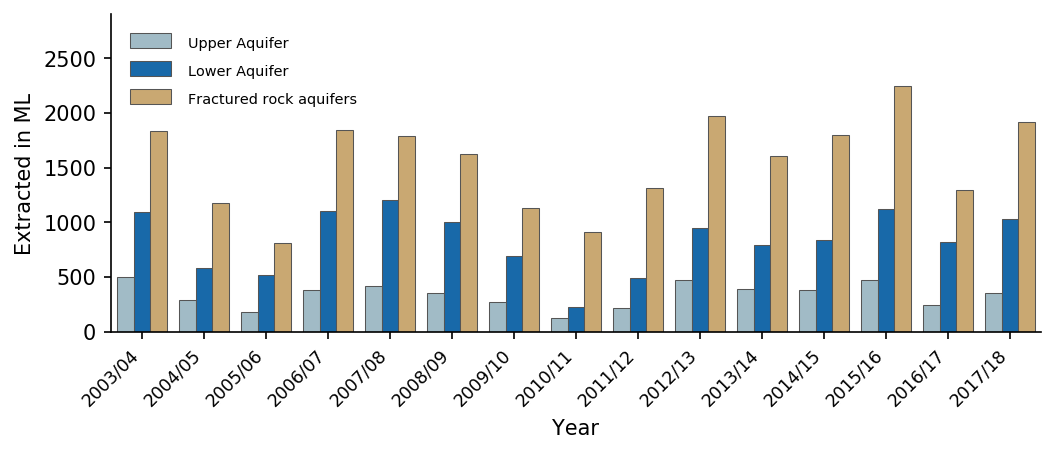

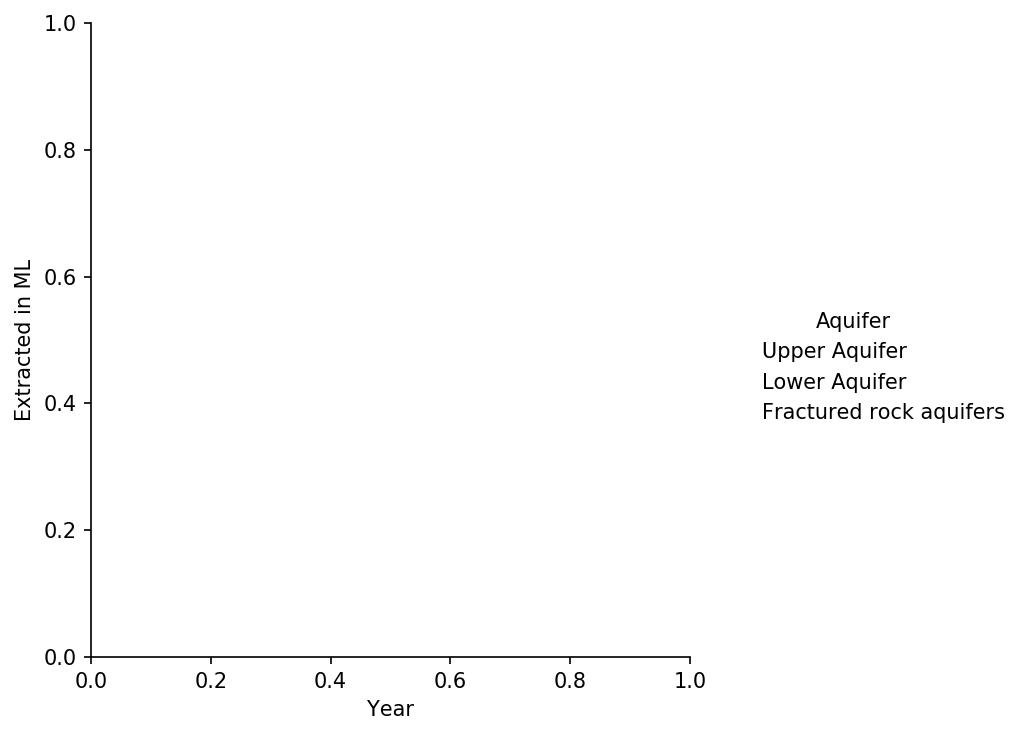

In [37]:
fig = plt.figure(figsize=(3.6, 2.8))
fig = plt.figure(figsize=(8, 2.8))

ax = fig.add_subplot(111)
fg = sns.catplot(
    x="Year",
    y="Extracted in ML",
    hue="Aquifer",
    data=dfm,
    kind="bar",
    ax=ax,
    #     palette="muted"
    palette=aquifer_colours,
    edgecolor="#555555",
    linewidth=0.5,
)
xticks = plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize="small")
# ax.set_xticklabels(x_labels, rotation=45, ha="right", fontsize="small")
leg = [c for c in ax.get_children() if isinstance(c, mlegend.Legend)][0]
for text in leg.get_texts():
    text.set_size("x-small")
# leg.get_title().set_size("small")
leg.set_title(False)
leg.set_frame_on(False)
ax.set_ylim(0, 2900)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

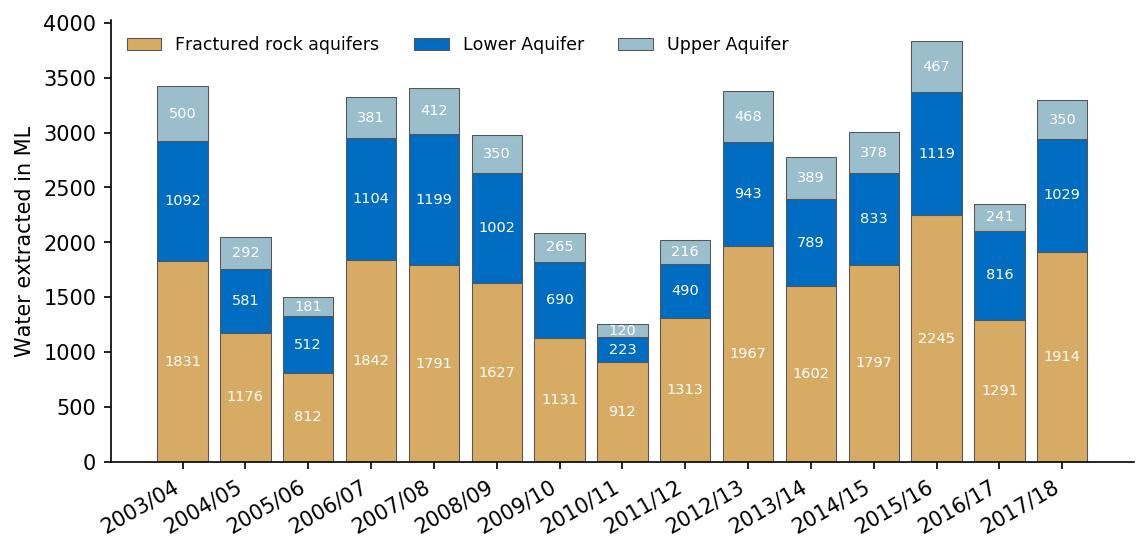

In [38]:
fig = plt.figure(figsize=(8.8, 3.9))
ax = fig.add_subplot(111)
idx = np.arange(len(df.Year))
width = 0.8

series_to_plot = [
    "Fractured rock aquifers",  #: {"facecolor": (166/255, 170/255, 255/255, 1), "label": "Estimated non-licensed surface water"},
    "Lower Aquifer",  #: {"facecolor": (82/255, 89/255, 217/255, 1), "label": "Licensed surface water"},
    "Upper Aquifer",  #: {"facecolor": (70/255, 80/255, 122/255, 1), "label": "Licensed groundwater"},
    #     "Imported water - BIL": {"facecolor": (49/255, 133/255, 156/255, 1), "label": "Imported water - BIL"},
    #     "Imported water - SA Water": {"facecolor": (75/255, 172/255, 198/255, 1), "label": "Imported water - SA Water"},
]

bottom = np.asarray(idx) * 0.0
for i, name in enumerate(series_to_plot):
    series = df[name]
    ax.bar(
        idx,
        series,
        width,
        bottom=bottom,
        label=name,
        facecolor=aquifer_colours[name],
        edgecolor="#555555",
        linewidth=0.5,
    )
    for j in idx:
        #         print(f"j {j} bottom[j] {bottom[j]} series[j] {series.iloc[j]}")
        v = series.iloc[j]
        y = bottom[j] + v / 2
        if not np.isnan(v):
            ax.text(
                j,
                y,
                int(v),
                ha="center",
                va="center",
                fontsize="x-small",
                color="white",
            )
    bottom += np.asarray(series.values, dtype="float")
ax.legend(loc="upper left", fontsize="small", frameon=False, ncol=3)
xts = ax.set_xticks(idx)
xtlabels = ax.set_xticklabels(df.Year, rotation=30, ha="right")
ax.set_ylabel("Water extracted in ML")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.set_ylim(0, 4700)